## Exploratory Data Analysis
_________________________________________________


In [1]:
# Importing Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dependencies for text cleanup
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

# Required downloads
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jyots\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jyots\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jyots\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jyots\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [49]:
# Reading Fake and True news files
True_csv = Path('/content/drive/MyDrive/Resources/True.csv')
True_df = pd.read_csv(True_csv)
Fake_csv = Path('/content/drive/MyDrive/Resources/Fake.csv')
Fake_df = pd.read_csv(Fake_csv)

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Familiarising with datasets
_________________________________________________

In [50]:
# Checking dataset info
True_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [51]:
Fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [52]:
# Displaying sample data from the True data frame
True_df.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [53]:
# Displaying sample data from the True data frame
True_df.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [54]:
# Displaying sample data from the Fake data frame
Fake_df.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [55]:
# Displaying sample data from the Fake data frame
Fake_df.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [56]:
# Finding unique values for 'subject' in both dataframes
True_df["subject"].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [57]:
Fake_df["subject"].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

## Data Cleaning
-------------------------------------

#### It can be seen above that there is publisher information in the 'text' field with '-' followed by the text in True data frame. This is not the case in Fake data frame. So removing publisher into a seperate column in the True dataset.

In [58]:
# Removing publisher into a seperate column in the True dataset
split_text = True_df['text'].astype(str).str.split(pat='-', n=1, expand=True)
True_df['publisher'] = split_text[0].str.strip()
True_df['text'] = split_text[1].str.strip()
True_df.head(10)

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to k...,politicsNews,"December 29, 2017","WEST PALM BEACH, Fla./WASHINGTON (Reuters)"
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he bel...,politicsNews,"December 29, 2017","WEST PALM BEACH, Fla (Reuters)"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,While the Fake News loves to talk about my so-...,politicsNews,"December 29, 2017",The following statements were posted to the ve...
8,Trump on Twitter (Dec 28) - Global Warming,"Together, we are MAKING AMERICA GREAT AGAIN! b...",politicsNews,"December 29, 2017",The following statements were posted to the ve...
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said h...,politicsNews,"December 28, 2017",WASHINGTON (Reuters)


In [59]:
# List of unique publishers in the dataset
True_df["publisher"].unique().tolist()

['WASHINGTON (Reuters)',
 'SEATTLE/WASHINGTON (Reuters)',
 'WEST PALM BEACH, Fla./WASHINGTON (Reuters)',
 'WEST PALM BEACH, Fla (Reuters)',
 'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump :',
 '(Reuters)',
 'NEW YORK/WASHINGTON (Reuters)',
 '(In Dec. 25 story, in second paragraph, corrects name of Strong’s employer to Mental Health Department, not Public Health Department.) By Bernie Woodall (Reuters)',
 'NEW YORK (Reuters)',
 'LIMA (Reuters)',
 'MEXICO CITY (Reuters)',
 'VATICAN CITY (Reuters)',
 'KING OF PRUSSIA, Pennsylvania/WASHINGTON (Reuters)',
 'SAN FRANCISCO (Reuters)',
 'BOSTON (Reuters)',
 'ATLANTA (Reuters)',
 '(Corrects spelling of Virginia House of Delegates member David Yancey throughout in this Dec. 19 story.) By Sharon Bernstein (Reuters)',
 'WASHINGTON ()',
 '

#### The news source is primarily reuters. There are some twitter feeds as well. We can also see that there is some news text that has come into the publisher column as well

In [60]:
# Cleaning up subject in Fake dataframe
Fake_df = Fake_df.replace({'subject':{'politics': 'politicsNews'}})

In [61]:
# Data count in True data frame
True_df.count()

title        21417
text         21415
subject      21417
date         21417
publisher    21417
dtype: int64

#### There is missing text in 2 rows as can be seen from the above counts. Dropping rows with missing text

In [62]:
# Drop rows with missing values
True_df.dropna(inplace=True)

In [63]:
# Data count in True data frame
True_df.count()

title        21415
text         21415
subject      21415
date         21415
publisher    21415
dtype: int64

In [64]:
# Data count in Fake data frame
Fake_df.count()

title      23481
text       23481
subject    23481
date       23481
dtype: int64

In [65]:
# Checking for null data in True news file
True_df.isnull().sum()

title        0
text         0
subject      0
date         0
publisher    0
dtype: int64

In [66]:
Fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

#### There is no missing data in either of the dataframes now

In [67]:
# Checking for duplicate values in the files
print(f'Number of duplicate entries in True news dataset: {True_df.duplicated().sum()}')
print(f'Number of duplicate entries in Fake news dataset: {Fake_df.duplicated().sum()}')

Number of duplicate entries in True news dataset: 206
Number of duplicate entries in Fake news dataset: 3


#### There are 206 duplicates in the True news and 3 duplicates in the Fake news dataset that we need to remove

In [68]:
# Displaying Duplicate rows in the True news file
print(True_df[True_df.duplicated(keep=False)])

                                                   title  \
416    Senate tax bill stalls on deficit-focused 'tri...   
445    Senate tax bill stalls on deficit-focused 'tri...   
762    Trump warns 'rogue regime' North Korea of grav...   
778    Trump warns 'rogue regime' North Korea of grav...   
850    Republicans unveil tax cut bill, but the hard ...   
...                                                  ...   
21290  Europeans, Africans agree renewed push to tack...   
21345  Thailand's ousted PM Yingluck has fled abroad:...   
21353  Thailand's ousted PM Yingluck has fled abroad:...   
21406  U.S., North Korea clash at U.N. forum over nuc...   
21408  U.S., North Korea clash at U.N. forum over nuc...   

                                                    text       subject  \
416    The U.S. Senate on Thursday delayed voting on ...  politicsNews   
445    The U.S. Senate on Thursday delayed voting on ...  politicsNews   
762    U.S. President Donald Trump arrived in China o... 

In [69]:
# Displaying Duplicate rows in the Fake news file
print(Fake_df[Fake_df.duplicated(keep=False)])

                                                   title  \
9941   HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...   
9942   HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...   
11445  FORMER DEMOCRAT WARNS Young Americans: “Rioter...   
11446  FORMER DEMOCRAT WARNS Young Americans: “Rioter...   
14924  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   
14925  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   

                                                    text       subject  \
9941   No time to waste   we've got to fight with eve...  politicsNews   
9942   No time to waste   we've got to fight with eve...  politicsNews   
11445   Who is silencing political speech, physically...  politicsNews   
11446   Who is silencing political speech, physically...  politicsNews   
14924  They were probably just looking for a  safe sp...  politicsNews   
14925  They were probably just looking for a  safe sp...  politicsNews   

               date  
9941    Sep 9, 2017  
9942    Sep 9, 2

In [70]:
# Removing rows with duplicate values from each file
# Removing duplicates from True news file
True_df = True_df.drop_duplicates()
True_df = True_df.reset_index(drop=True)
# Removing duplicates from Fake news file
Fake_df = Fake_df.drop_duplicates()
Fake_df = Fake_df.reset_index(drop=True)

In [71]:
# Final number of records in the true news and Fake news files
print(f'Number of entries in True news dataset: {True_df.shape[0]}')
print(f'Number of entries in Fake news dataset: {Fake_df.shape[0]}')

Number of entries in True news dataset: 21209
Number of entries in Fake news dataset: 23478


#### Total number of entries left in the True news dataset is 21,209 and Fake news dataset is 23,478

In [72]:
# Adding column for true or fake indication to each dataset
True_df["Class"] = 1
Fake_df["Class"] = 0

In [73]:
Fake_df.tail()

,title,text,subject,date,Class
23473,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23474,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23475,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23476,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23477,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


## Merging the two files into one dataset
______________________________________________________________

In [74]:
# Merging Publisher back to text as we would like to use it for analysis and dropping publisher column from True_df
True_df['text']= True_df['publisher'] + " " + True_df['text']

# Dropping unwanted columns
True_df = True_df.drop(['publisher'], axis=1)
True_df.tail()

,title,text,subject,date,Class
21204,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) NATO allies on Tuesday welc...,worldnews,"August 22, 2017",1
21205,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) LexisNexis, a provider of leg...",worldnews,"August 22, 2017",1
21206,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) In the shadow of disused Sovie...,worldnews,"August 22, 2017",1
21207,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) Vatican Secretary of State Ca...,worldnews,"August 22, 2017",1
21208,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) Indonesia will buy 11 Sukhoi...,worldnews,"August 22, 2017",1


In [75]:
# Merging the two files into one dataset
news_df = pd.concat([True_df, Fake_df], axis=0 )
news_df.shape[0]

44687

In [76]:
news_df.head()

,title,text,subject,date,Class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) The head of a conservativ...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) Transgender people will b...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) The special counsel inves...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) Trump campaign adviser Ge...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) President Donald ...,politicsNews,"December 29, 2017",1


In [77]:
news_df.tail()

,title,text,subject,date,Class
23473,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23474,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23475,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23476,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23477,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


## Visualisations
________________________________________

#### 1. Bar Graph of fake news and real news counts

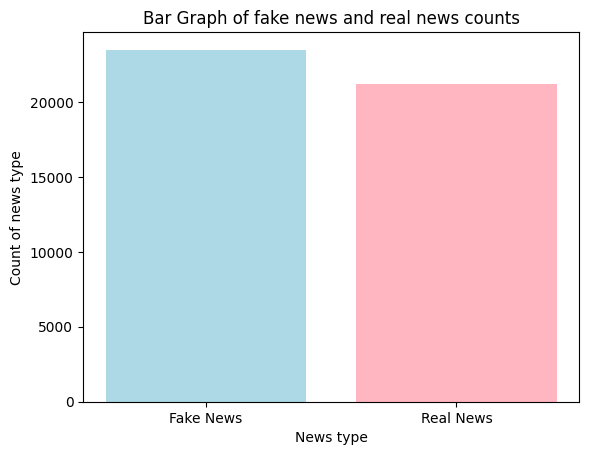

In [78]:
# Bar Graph of fake news and real news counts
plt.bar('Fake News',len(Fake_df),color='LightBlue')
plt.bar('Real News',len(True_df),color='LightPink')
plt.title('Bar Graph of fake news and real news counts')
plt.xlabel('News type')
plt.ylabel('Count of news type')
plt.show()

#### 2. Pie Chart of fake news and real news percentage

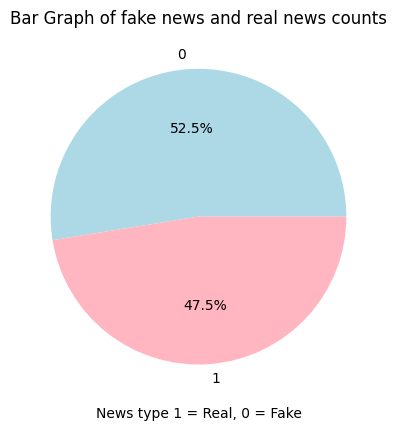

In [79]:
# Pie chart of fake news and real news %
plt.pie(news_df["Class"].value_counts().values,explode=[0,0],labels=news_df.Class.value_counts().index, autopct='%1.1f%%',colors=['LightBlue','LightPink'])
plt.title('Bar Graph of fake news and real news counts')
plt.xlabel('News type 1 = Real, 0 = Fake')
plt.show()

#### The precentage of Fake vs real news is 52.5% to 47.5% which shows that the dataset is fairly balanced

#### 3. Distribution of The Subject by Real and Fake Data

Text(0.5, 1.0, 'Distribution of Subjects by Real and Fake Data')

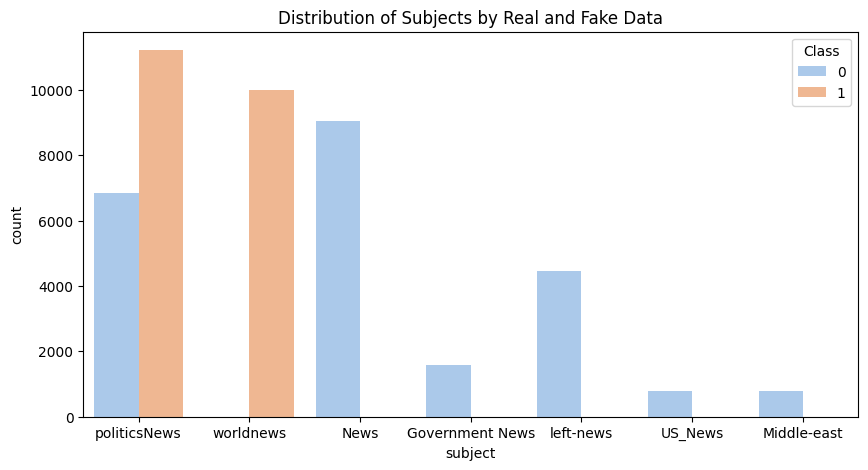

In [80]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="subject",  hue='Class', data=news_df, palette="pastel")
plt.title("Distribution of Subjects by Real and Fake Data")
# https://seaborn.pydata.org/generated/seaborn.countplot.html

####  Subjects are not evenly distributed. Real news data are categorised only into two groups whereas fake news are categorised into 6

## Further Data Cleaning
----------------------------------------------

#### We could concatenate the columns with text data into one and drop unwanted columns
1. Date column is not relevant since we are only analysing text for our predictive model hence it may be dropped
2. Subjects are not consistent for both classes, hence we could drop the column as well
3. We could concatenate title and text columns since all three could contribute in determining validity or fakeness of the text

#### Concatenating columns

In [81]:
news_df['text']= news_df['title'] + " " + news_df['text']

# Dropping unwanted columns
news_df = news_df.drop(['title', 'subject', 'date'], axis=1)
news_df.tail()

,text,Class
23473,McPain: John McCain Furious That Iran Treated ...,0
23474,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23475,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23476,How to Blow $700 Million: Al Jazeera America F...,0
23477,10 U.S. Navy Sailors Held by Iranian Military ...,0


In [82]:
# Viewing sample text
news_df['text'].head(1).to_list()

['As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-

#### Converting text to lower case

In [83]:
# Converting text to lowercase
news_df['text'] = news_df['text'].str.lower()
news_df['text'].head(1).to_list()

['as u.s. budget fight looms, republicans flip their fiscal script washington (reuters) the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, speaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in january. when they return from the holidays on wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the november congressional election campaigns approach in which republicans will seek to keep control of congress. president donald trump and his republicans want a big budget increase in military spending, while democrats also want proportional increases for non-

In [84]:
sample_text = news_df['text'].head(1)

#### Removing special characters, punctuations, stop words and lemmatization

In [ ]:
# news_df.to_csv('news_df.csv')

In [85]:
# Creating functions for Data Cleaning

# Function for Removal of stopwords and lemmatization
def remove_stopwords_lemma(text):
    final_text = []
    text = nltk.word_tokenize(text)

    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_text.append(word)
    return " ".join(final_text)

# Function for Removal of Special Characters
def remove_special_char(text):
    return re.sub("[^a-zA-Z]"," ",text)

# Function for removing extra whitespaces
def remove_whitespace(text):
    return  " ".join(text.split())

# Function for Data cleaning
def data_cleaning(text):
    text = remove_stopwords_lemma(text)
    text = remove_special_char(text)
    text = remove_whitespace(text)
    return text

sample_text = data_cleaning(sample_text[0])

sample_text

'u s budget fight loom republican flip fiscal script washington reuters head conservative republican faction u s congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republican u s representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase non defense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration already willing say going increase non defense discretionary spending percent meadow chairman small influential house freedom cau

In [88]:
# Applying function on text column
news_df['text']=news_df['text'].apply(data_cleaning)

In [89]:
news_df['text'].head(1).to_list()

['u s budget fight loom republican flip fiscal script washington reuters head conservative republican faction u s congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republican u s representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase non defense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration already willing say going increase non defense discretionary spending percent meadow chairman small influential house freedom ca

In [93]:
# Correcting US
news_df = news_df.replace({'u s ': 'us '}, regex=True)

In [94]:
news_df.to_csv('news_df.csv')

## Loading clean data file for further visualisation
-------------------------------------------------------------

In [3]:
# Reading cleaned news file
news_clean_csv = Path('news_df.csv')
news_clean_df = pd.read_csv(news_clean_csv)
news_clean_df.head()

,Unnamed: 0,text,Class
0,0,us budget fight loom republican flip fiscal sc...,1
1,1,us military accept transgender recruit monday ...,1
2,2,senior us republican senator let mr mueller jo...,1
3,3,fbi russia probe helped australian diplomat ti...,1
4,4,trump want postal service charge much amazon s...,1


In [4]:
news_clean_df = news_clean_df.drop(['Unnamed: 0'], axis=1)
news_clean_df.head()

,text,Class
0,us budget fight loom republican flip fiscal sc...,1
1,us military accept transgender recruit monday ...,1
2,senior us republican senator let mr mueller jo...,1
3,fbi russia probe helped australian diplomat ti...,1
4,trump want postal service charge much amazon s...,1


## Visualization of cleaned data
---------------------------------------------


### Number of words in text

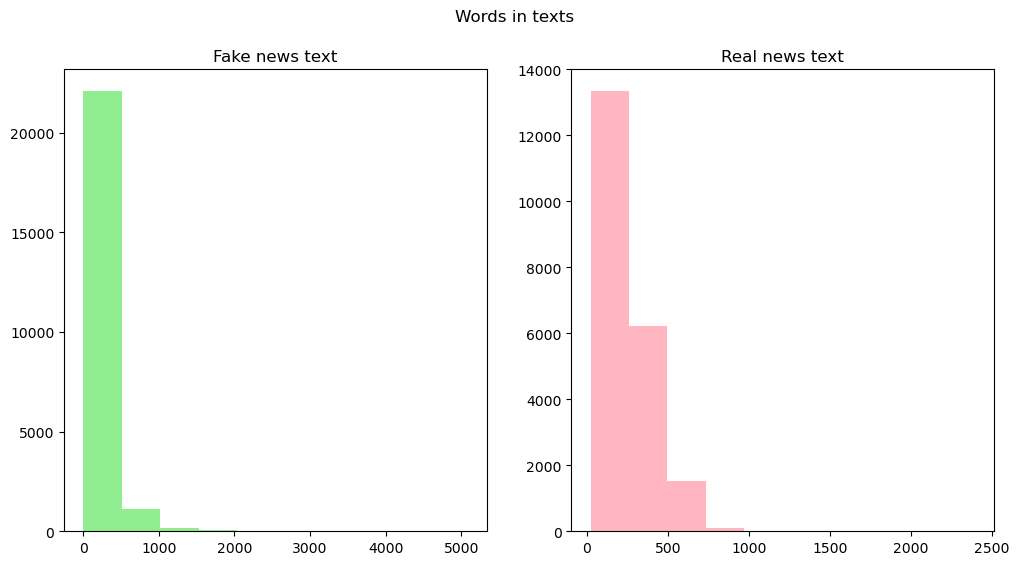

In [57]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
text_len=news_clean_df[news_clean_df['Class']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='LightGreen')
ax1.set_title('Fake news text')
text_len=news_clean_df[news_clean_df['Class']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='lightpink')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

#### Number of words in Fake news seems to be on an average higher at around 500 compared to in Real news at 250 words 

### WordClouds

#### Real News

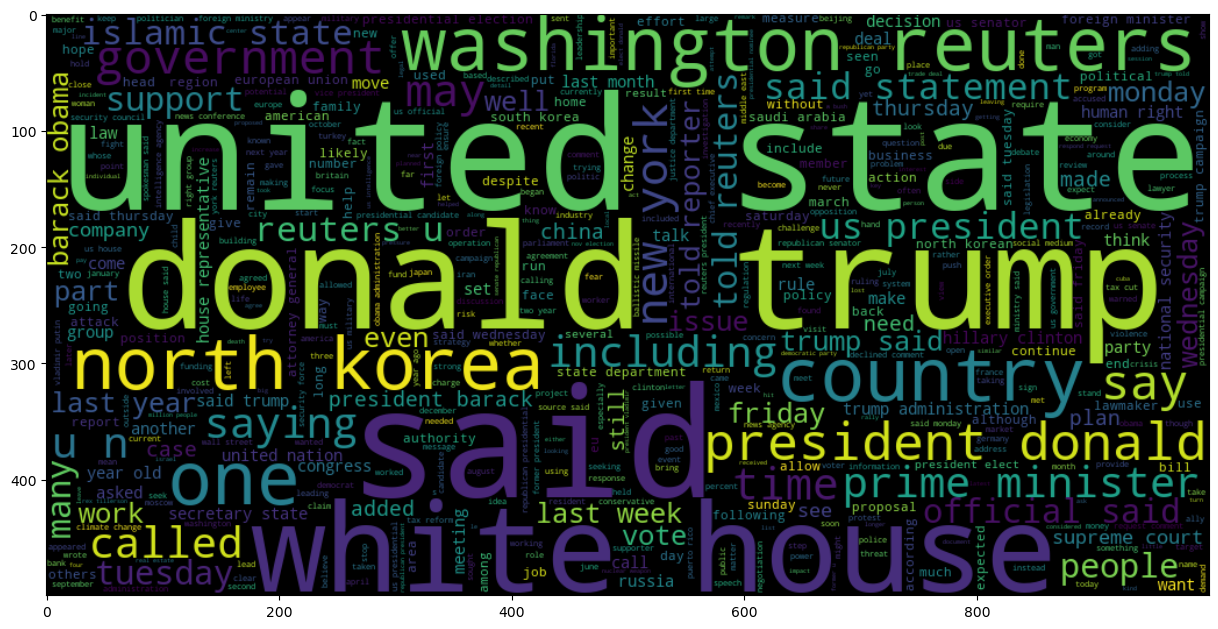

In [46]:
# WorldCloud of Real News
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(news_clean_df[news_clean_df["Class"] == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

#### Fake News

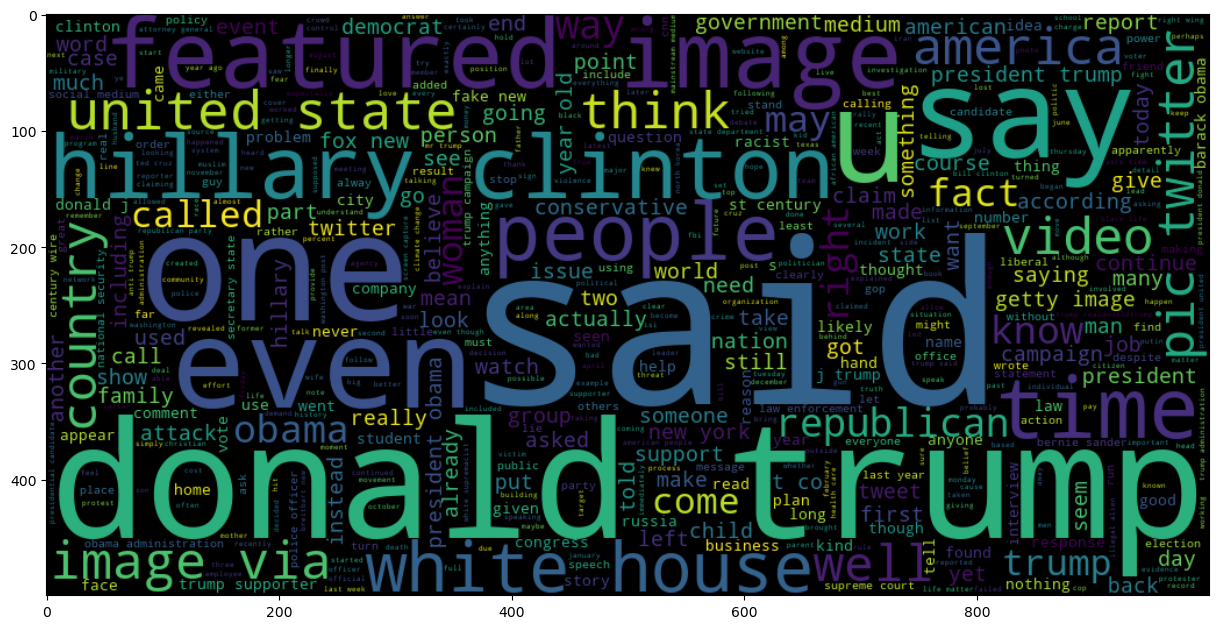

In [47]:
# WorldCloud of Fake News
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(news_clean_df[news_clean_df["Class"] == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

### N-Gram Analysis

In [5]:
# Getting list of words
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(news_clean_df.text)
corpus[:5]

['us', 'budget', 'fight', 'loom', 'republican']

In [6]:
# Getting top 5 most common words with count
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'trump': 149106,
 'said': 131837,
 'state': 61501,
 'president': 58480,
 'us': 55990,
 'would': 55341,
 'people': 42454,
 'year': 41444,
 'republican': 41079,
 'one': 39763}

In [7]:
# Using CountVectorizer to Extracting Features from Text
# Ref: https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### Unigram analysis

<Axes: >

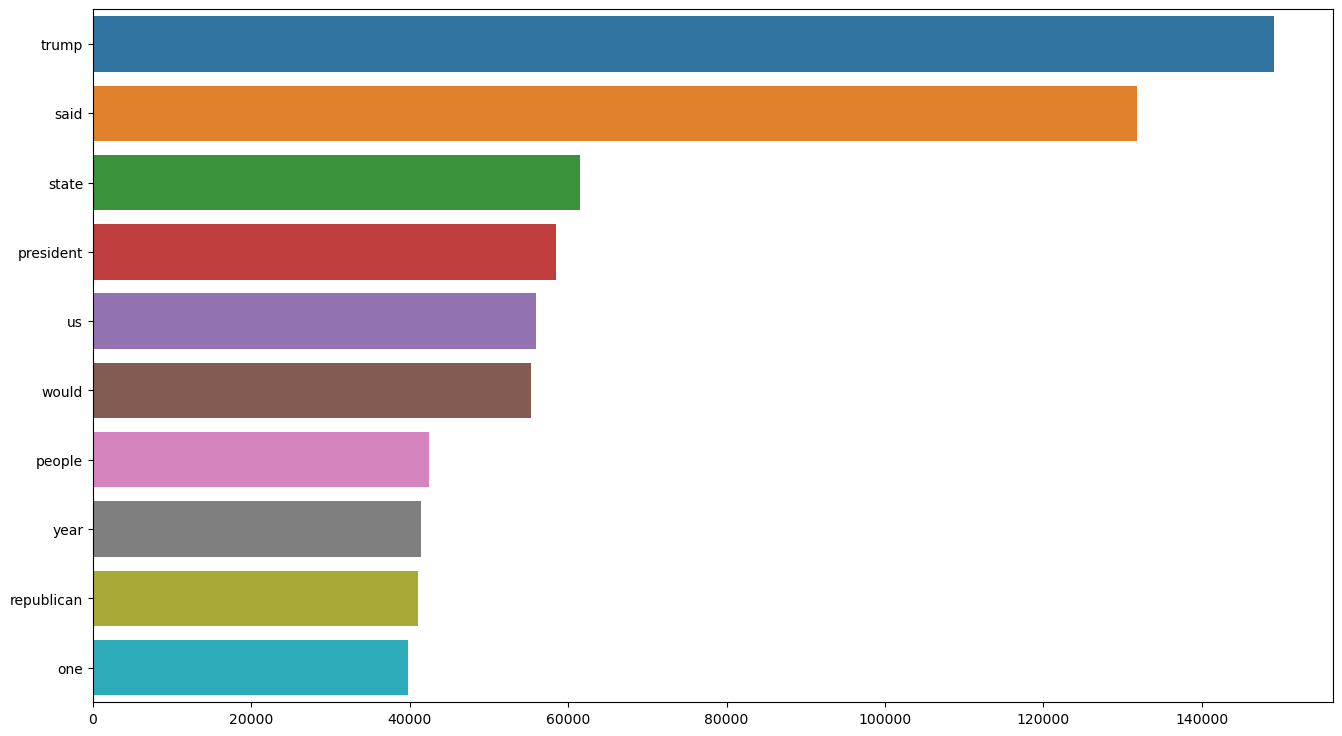

In [8]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(news_clean_df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

#### Bigram analysis

<Axes: >

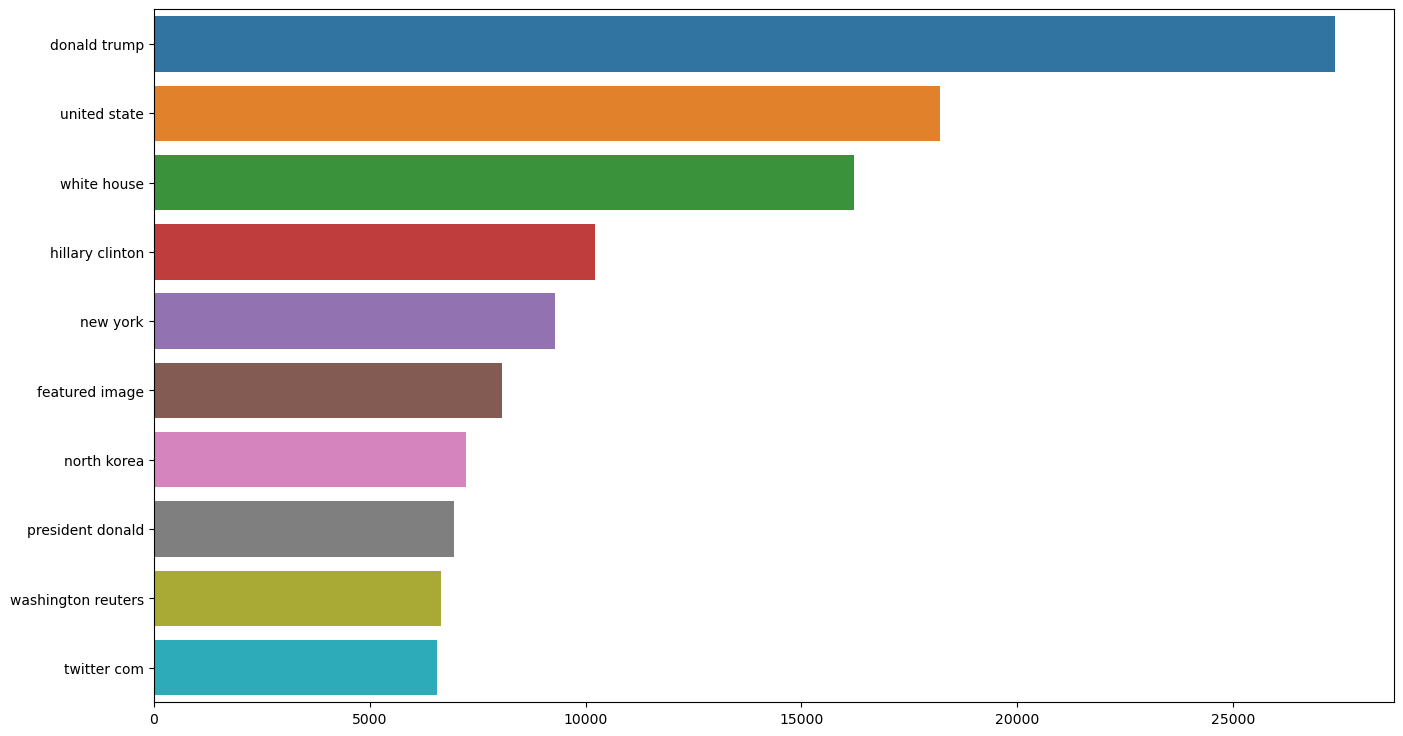

In [9]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(news_clean_df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

#### Trigram analysis

<Axes: >

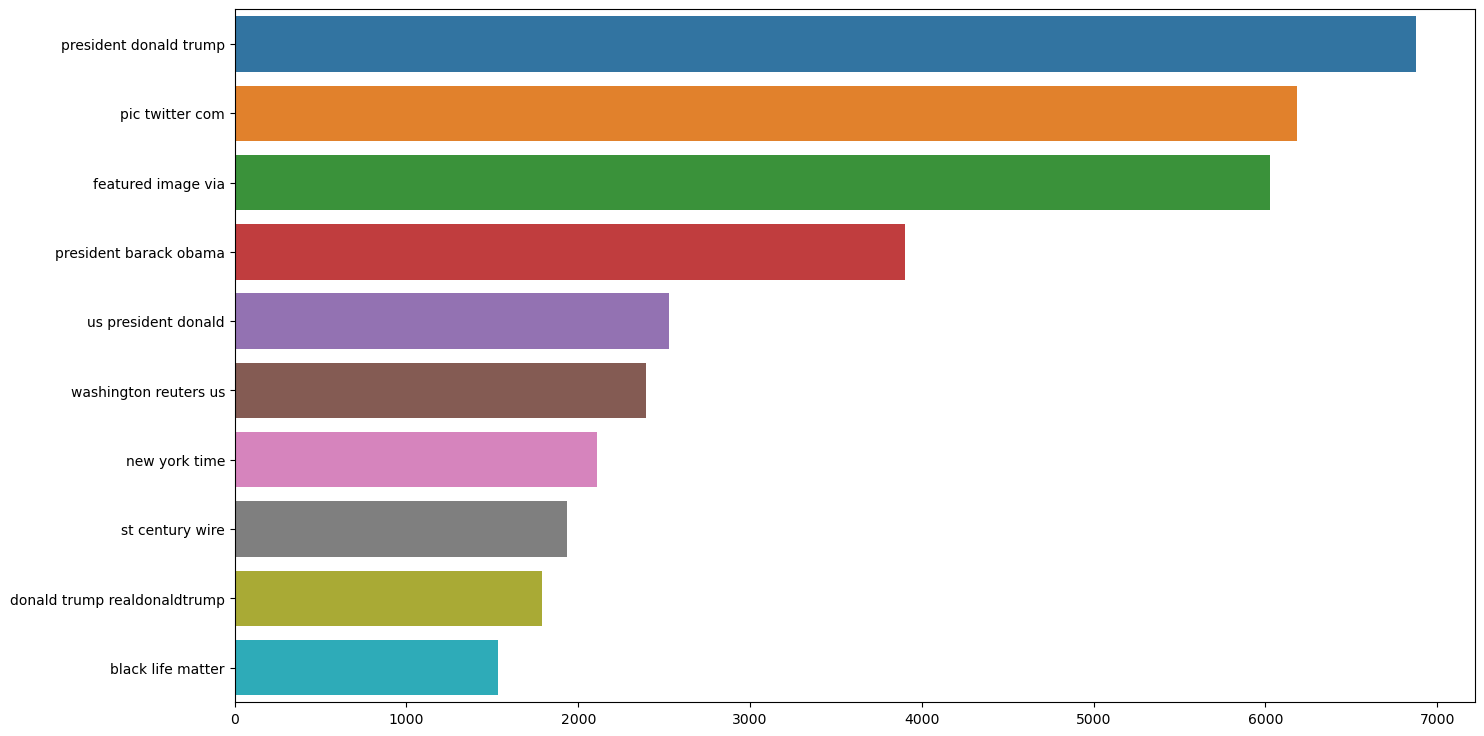

In [10]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(news_clean_df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))